# Installing required dependecies

In [ ]:
# install the model
!pip install prophet

In [7]:
# import the model to the notebook
import pandas as pd
from prophet import Prophet

In [8]:
# load data into our notebook
df = pd.read_csv('transactions.csv')
df.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
# lets look at the datatypes for these columns
df.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

# Data preprocessing


In [10]:
# convert date column from string to date-time format
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

In [12]:
# drop the store_nbr column for we need two columns ds and y
df.drop('store_nbr', axis=1, inplace=True)

In [13]:
df.head(5)

,date,transactions
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922


In [14]:
# rename date column to ds and transaction column to y
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922


In [18]:
df.tail()

,ds,y
83483,2017-08-15,2804
83484,2017-08-15,1573
83485,2017-08-15,2255
83486,2017-08-15,932
83487,2017-08-15,802


# Training the time series model

In [15]:
# create an instance p of the Prophet class
# daily seasonality true for a sub-daily time series 
# defaults to weekly and yearly if not set
# use interval width to estimate the uncertainity interval from sample
p = Prophet(interval_width=0.92, daily_seasonality=True)

In [16]:
# train the model
model = p.fit(df)

13:56:05 - cmdstanpy - INFO - Chain [1] start processing
13:56:13 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Make prediction and evaluate performance
future = p.make_future_dataframe(periods=200, freq='D')
future.tail()

,ds
1877,2018-02-27
1878,2018-02-28
1879,2018-03-01
1880,2018-03-02
1881,2018-03-03


In [23]:
# to predict, we pass the predict() method in future dataframe
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1877,2018-02-27,1000.134786,-77.282090,3428.110680,975.093896,1021.861129,596.243672,596.243672,596.243672,734.632387,...,-95.380357,-95.380357,-95.380357,-43.008358,-43.008358,-43.008358,0.0,0.0,0.0,1596.378459
1878,2018-02-28,1000.311947,36.511696,3329.602742,975.142830,1022.174820,623.142473,623.142473,623.142473,734.632387,...,-72.423855,-72.423855,-72.423855,-39.066059,-39.066059,-39.066059,0.0,0.0,0.0,1623.454419
1879,2018-03-01,1000.489107,-19.278680,3206.830436,975.191765,1022.488511,556.458188,556.458188,556.458188,734.632387,...,-143.603858,-143.603858,-143.603858,-34.570340,-34.570340,-34.570340,0.0,0.0,0.0,1556.947295
1880,2018-03-02,1000.666267,36.510049,3341.013619,975.228868,1022.802202,665.480540,665.480540,665.480540,734.632387,...,-39.457262,-39.457262,-39.457262,-29.694585,-29.694585,-29.694585,0.0,0.0,0.0,1666.146808
1881,2018-03-03,1000.843427,338.264546,3709.107295,975.221308,1023.115893,965.880503,965.880503,965.880503,734.632387,...,255.867875,255.867875,255.867875,-24.619759,-24.619759,-24.619759,0.0,0.0,0.0,1966.723930


In [25]:
# create prediction dataframe
pred_df = forecast_prediction[['ds', 'yhat']]
pred_df.head()

,ds,yhat
0,2013-01-01,1977.986468
1,2013-01-02,1959.813437
2,2013-01-03,1845.881999
3,2013-01-04,1906.352930
4,2013-01-05,2157.776801


In [29]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1882 non-null   datetime64[ns]
 1   yhat    1882 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.5 KB


# Vizualization 

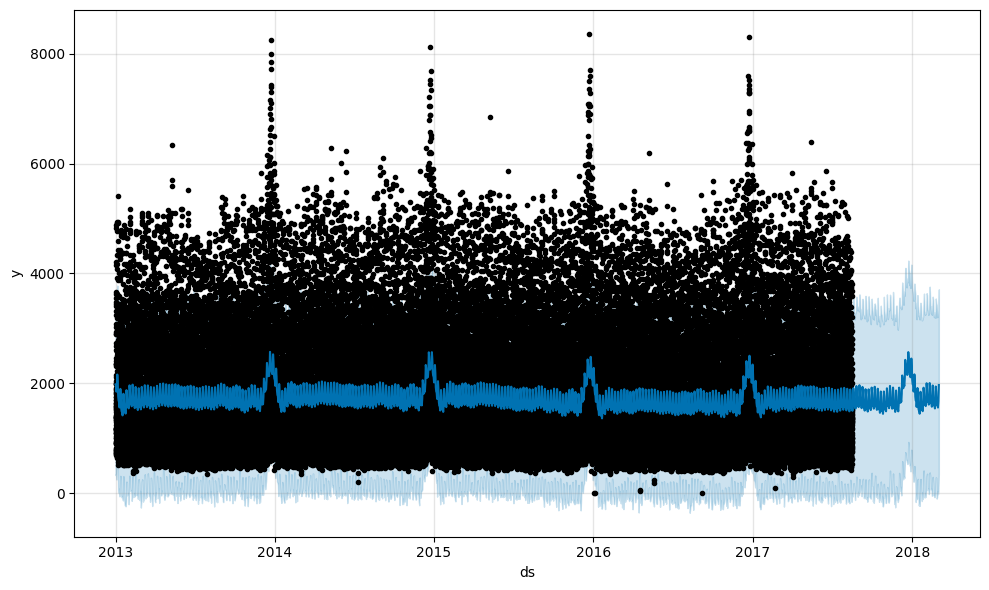

In [30]:
# we can visualize the predictions
plot1 = p.plot(forecast_prediction)

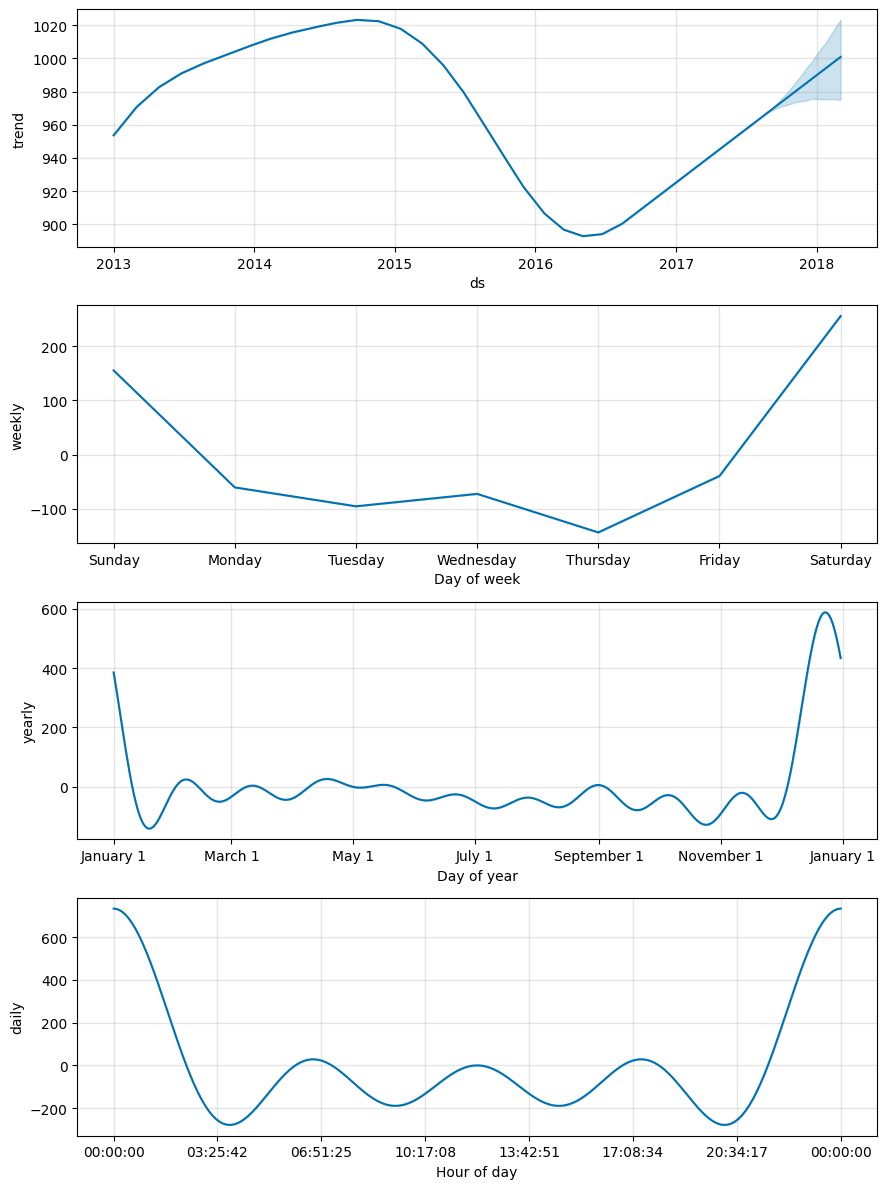

In [32]:
# plot individual components that make the above plot
plot2 = p.plot_components(forecast_prediction)

In [34]:
# export prediction to csv
pred_df.to_csv('prediction.csv', index=False)